In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
df=pd.read_csv('Crop_recommendation.csv')

In [262]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [263]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [264]:
df.shape

(2200, 8)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [266]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [271]:
len(df['label'].unique())

22

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

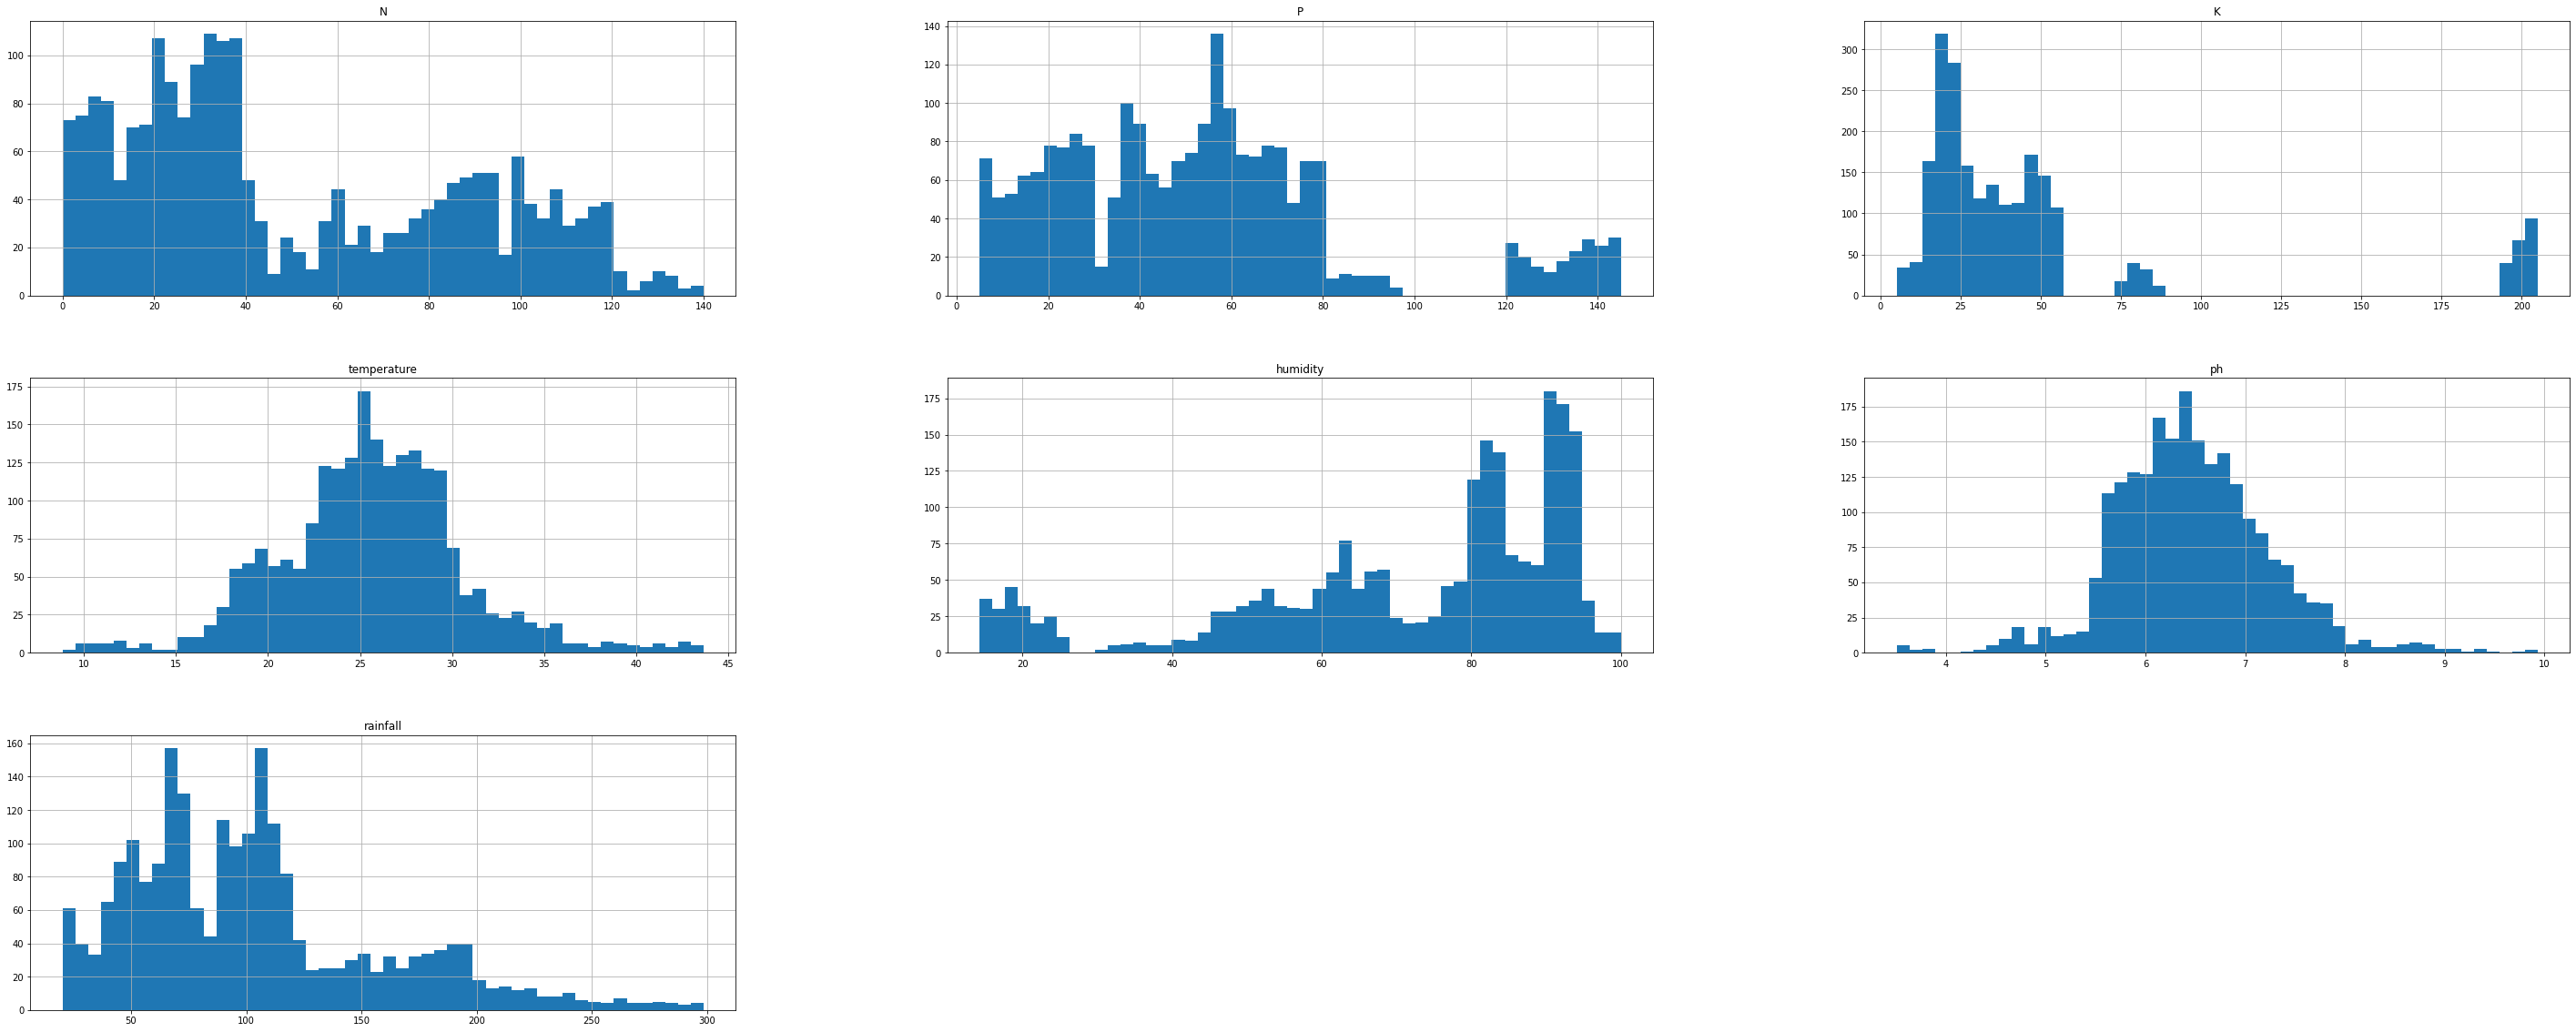

In [211]:
df.hist(bins=50,figsize=(50,20))

In [212]:
df['label'].value_counts()

blackgram      100
mango          100
cotton         100
papaya         100
grapes         100
pomegranate    100
coffee         100
coconut        100
pigeonpeas     100
watermelon     100
banana         100
apple          100
maize          100
jute           100
lentil         100
mothbeans      100
mungbean       100
chickpea       100
orange         100
kidneybeans    100
muskmelon      100
rice           100
Name: label, dtype: int64

In [213]:
from sklearn.preprocessing import LabelEncoder

In [214]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.head()
df['label'].value_counts()

0     100
2     100
19    100
17    100
15    100
13    100
11    100
9     100
7     100
5     100
3     100
1     100
20    100
18    100
16    100
14    100
12    100
10    100
8     100
6     100
4     100
21    100
Name: label, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
from sklearn.model_selection import cross_val_score

In [217]:
from sklearn.ensemble import VotingClassifier

In [218]:
from sklearn.preprocessing import StandardScaler


In [219]:
X=df[df.columns[:-1]]

In [220]:
y=df['label']

In [221]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [222]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=42)

In [223]:
sc=StandardScaler()

In [224]:
X_train=sc.fit_transform(X_train)
X_cv=sc.transform(X_cv)

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
lr=LogisticRegression(penalty='l2',C=1.5,solver='lbfgs')

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:

rf=RandomForestClassifier(n_estimators=150)

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [230]:
knn=KNeighborsClassifier(n_neighbors=7)

In [231]:
from sklearn.svm import SVC

In [232]:
svc=SVC(kernel='rbf',C=1.5,gamma=0.5,probability=True)

In [233]:
v=VotingClassifier([('sc',svc),('knn',knn),('lr',lr),('rf',rf)])

In [234]:
v.fit(X_train,y_train)

c:\users\niranjan hegde\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('sc', SVC(C=1.5, gamma=0.5, probability=True)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('lr', LogisticRegression(C=1.5)),
                             ('rf', RandomForestClassifier(n_estimators=150))])

In [235]:
y_pred=v.predict(X_cv)

In [236]:
from sklearn.metrics import classification_report

In [237]:
print(classification_report(y_cv,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.93      0.96      0.94        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.81      1.00      0.89        34
           9       0.95      1.00      0.97        36
          10       0.85      1.00      0.92        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      0.91      0.95        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
          17       1.00    

In [238]:
y_actual=le.inverse_transform(y_pred)

In [239]:
y_actual

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'lentil', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'lentil',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickpea',
 

In [240]:
a=np.array([[90,100,40,30.5,80.0,6.5,200]])

In [241]:
x=sc.transform(a)

In [242]:
y_pr=v.predict(x)

In [243]:
y_pr

array([1])

In [244]:
y_pr=le.inverse_transform(y_pr)

In [245]:
y_pr

array(['banana'], dtype=object)

In [246]:
import pickle

In [247]:
output = open('Crop_label_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

In [248]:
model=open("votingclassfier.pkl",'wb')

In [249]:
pickle.dump(v,model)
model.close()

In [250]:
standarscaler=open("stdscaler.pkl",'wb')
pickle.dump(sc,standarscaler)

In [251]:
standarscaler.close()

In [252]:
 list(lee.classes_)

['amsterdam', 'paris', 'tokyo']

In [272]:
rdd=np.array([1,2,3,4,5,6,7,8,9,10])
rdd1=np.array([7,6,5,4,5,6,7,8,9,10])

In [274]:
np.corrcoef(rdd,rdd1)

array([[1.        , 0.70927291],
       [0.70927291, 1.        ]])

In [275]:
np.cov(rdd,rdd1)

array([[9.16666667, 4.05555556],
       [4.05555556, 3.56666667]])

In [5]:
import pickle
import numpy as np

In [6]:
std= pickle.load(open('stdscaler.pkl', 'rb'))
a=np.array([[90,41,43,22.79,85.005,6.8,201.9]])
a=std.transform(a)

In [7]:
a

array([[ 1.03466348, -0.37244606, -0.10449834, -0.5500715 ,  0.60595029,
         0.42271719,  1.79626154]])